# Bike

In [1]:
import os

datapath = 'data/kaggle_bike'
listdir = os.listdir(datapath)
print(listdir)

['sampleSubmission.csv', 'test.csv', 'train.csv']


In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
import pandas as pd
import numpy as np

train_df = pd.read_csv(datapath + '/' + listdir[2])
print(train_df.shape)
train_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- datetime -> 년, 월, 일, 시:분:초. 4개로 분리
- pandas 에서는 이를 쉽게할 수 있게하는 datetime datatype이 존재

In [5]:
train_df.datetime

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [6]:
train_df['datetime'] = train_df.datetime.apply(pd.to_datetime) # 판다스의 datetime data type을 이용

train_df['year'] = train_df.datetime.apply(lambda x: x.year)
train_df['month'] = train_df.datetime.apply(lambda x: x.month)
train_df['day'] = train_df.datetime.apply(lambda x: x.day)
train_df['hour'] = train_df.datetime.apply(lambda x: x.hour)
train_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [7]:
drop_columns = ['datetime', 'casual', 'registered'] # 다중공성성 문제 예방
train_df.drop(drop_columns, axis=1, inplace=True)

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, ped):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print("RMSLE: {0:.3f}, RMSE: {1: .3f}, MAE: {2:.3f}".format(rmsle_val, rmse_val, mae_val))

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = train_df['count']
X_features = train_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 66.611, RMSE:  141.918, MAE: 106.232


In [12]:
def get_top_error_data(y_test, pred, n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = (np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

In [13]:
get_top_error_data(y_test, pred, 5)

      real_count  predicted_count   diff
2618         834            188.0  646.0
248          835            211.0  624.0
404          809            197.0  612.0
2756         784            181.0  603.0
1391         890            320.0  570.0


1.2420662117180776


<AxesSubplot:>

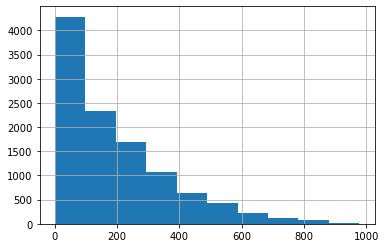

In [21]:
print(y_target.skew())
y_target.hist()

-0.8514116321738531


<AxesSubplot:>

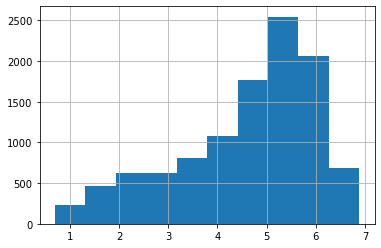

In [22]:
scaled_y = np.log1p(y_target)
print(scaled_y.skew())
scaled_y.hist()

In [25]:
y_target = train_df['count']
y_target_log = np.log1p(y_target)
X_features = train_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3)

y_test_exp = np.expm1(y_test)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)
get_top_error_data(y_test_exp, pred_exp, 5)

RMSLE: 181.859, RMSE:  263.118, MAE: 189.887
      real_count  predicted_count   diff
3128       834.0             76.0  758.0
1019       835.0             89.0  746.0
2615       148.0            888.0  740.0
819        784.0             72.0  712.0
2570       797.0            111.0  686.0


In [27]:
import seaborn as sns

<AxesSubplot:>

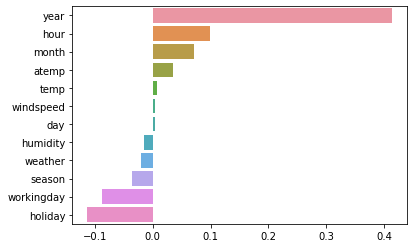

In [28]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [30]:
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [40]:
y_target = train_df['count']
y_target_log = np.log1p(y_target)
X_features = train_df.drop(['count'], axis=1, inplace=False)
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

y_test_exp = np.expm1(y_test)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 3.152, RMSE:  261.067, MAE: 189.846


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        pred = np.expm1(pred)
        y_test = np.expm1(y_test)
    print('###', model.__class__.__name__, '###')
    evaluate_regr(y_test, pred)

In [50]:
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.1)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 3.203, RMSE:  261.509, MAE: 189.972
### Ridge ###
RMSLE: 3.203, RMSE:  261.509, MAE: 189.972
### Lasso ###
RMSLE: 3.203, RMSE:  261.509, MAE: 189.972


<AxesSubplot:>

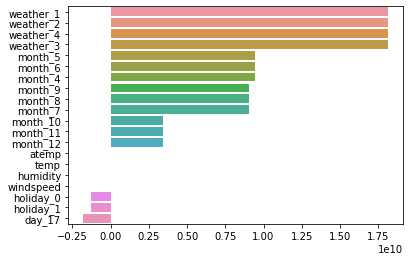

In [52]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

# House

In [2]:
import os

datapath = 'data/kaggle_house'
listdir = os.listdir(datapath)
print(listdir)

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']
